In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('Classified Data')

In [5]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


<h2>Scaling to normalize the values in different fields</h2>

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [10]:
scaled_features

array([[-1.73031962, -0.12354188,  0.18590747, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.72685552, -1.08483602, -0.43034845, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-1.72339142, -0.78870217,  0.33931821, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 1.72339142,  0.64177714, -0.51308341, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 1.72685552,  0.46707241, -0.98278576, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [ 1.73031962, -0.38765353, -0.59589427, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [11]:
df_features = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [12]:
df_features.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


<h2>Learning and Prediction</h2>

In [13]:
from sklearn.cross_validation import train_test_split

/home/nikamanth/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
X=df_features
y=df['TARGET CLASS']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [19]:
pred = knn.predict(X_test)

In [20]:
pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          0       0.92      0.91      0.92       159
          1       0.90      0.91      0.91       141

avg / total       0.91      0.91      0.91       300

[[145  14]
 [ 12 129]]


In [40]:
error_rate = []
for i in range(1,500):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
#     print(pred_i)   != y_test
    print(pred_i!=y_test)
    error_rate.append(np.mean(pred_i != y_test))
    

545    False
298    False
109    False
837     True
194    False
605    False
246    False
693    False
802     True
406     True
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866    False
555    False
716    False
81     False
756    False
796    False
612    False
699    False
915     True
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802     True
406     True
824    False
977    False
742   

545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802    False
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866    False
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802    False
406    False
824    False
977    False
742   

545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802    False
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866    False
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802    False
406    False
824    False
977    False
742   

545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802    False
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866    False
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802    False
406    False
824    False
977    False
742   

545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802    False
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866    False
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802    False
406    False
824    False
977    False
742   

545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802    False
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866    False
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802    False
406    False
824    False
977    False
742   

545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802    False
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866    False
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802    False
406    False
824    False
977    False
742   

545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802    False
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866    False
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802    False
406    False
824    False
977    False
742   

545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802    False
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866    False
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802    False
406    False
824    False
977    False
742   

545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802    False
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866    False
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802    False
406    False
824    False
977    False
742   

545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802    False
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866    False
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847     True
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802    False
406    False
824    False
977    False
742   

545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802    False
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866    False
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802    False
406    False
824    False
977    False
742   

545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866    False
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802    False
406    False
824    False
977    False
742   

545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866    False
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847     True
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742   

545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866    False
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742   

545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866    False
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742   

545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866    False
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742   

545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866    False
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742   

545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866    False
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742   

545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866    False
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742   

545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866    False
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742   

545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866    False
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742   

545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866    False
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742   

545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866    False
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742   

545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866    False
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742   

545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866    False
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742   

545    False
298    False
109    False
837    False
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866    False
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605     True
246    False
693    False
802     True
406    False
824    False
977    False
742   

545    False
298    False
109    False
837    False
194    False
605     True
246    False
693    False
802     True
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866    False
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605     True
246    False
693    False
802     True
406    False
824    False
977    False
742   

545    False
298    False
109    False
837    False
194    False
605     True
246    False
693    False
802     True
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866     True
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605     True
246    False
693    False
802     True
406    False
824    False
977    False
742   

545    False
298    False
109    False
837    False
194    False
605     True
246    False
693    False
802     True
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866     True
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837    False
194    False
605     True
246    False
693    False
802     True
406    False
824    False
977    False
742   

545    False
298    False
109    False
837     True
194    False
605     True
246    False
693    False
802     True
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866     True
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837     True
194    False
605     True
246    False
693    False
802     True
406    False
824    False
977    False
742   

545    False
298    False
109    False
837     True
194    False
605     True
246    False
693    False
802     True
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866     True
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389     True
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837     True
194    False
605     True
246    False
693    False
802     True
406    False
824    False
977    False
742   

545    False
298    False
109    False
837     True
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866     True
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389     True
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837     True
194    False
605    False
246    False
693    False
802     True
406    False
824    False
977    False
742   

545    False
298    False
109    False
837     True
194    False
605     True
246    False
693    False
802     True
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866     True
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389     True
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837     True
194    False
605     True
246    False
693    False
802     True
406    False
824    False
977    False
742   

545    False
298    False
109    False
837     True
194    False
605     True
246    False
693    False
802     True
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866     True
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915    False
801     True
729    False
577    False
260    False
938    False
389     True
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847     True
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool
545    False
298    False
109    False
837     True
194    False
605     True
246    False
693    False
802     True
406    False
824    False
977    False
742   

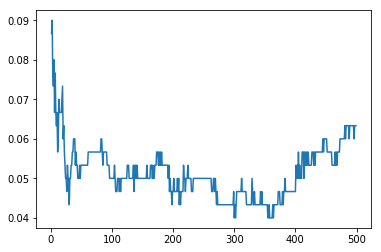

In [41]:
plt.plot(range(1,500),error_rate)

In [25]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          0       0.96      0.96      0.96       159
          1       0.96      0.95      0.95       141

avg / total       0.96      0.96      0.96       300

[[153   6]
 [  7 134]]


In [26]:
l1 = np.array([1,2,3])

In [30]:
l2= np.array([1,4,3])

In [31]:
np.mean(l1!=l2)

0.3333333333333333